In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

**Configuration:**

- Choose chromosome to plot (`chromo`). Possible values:

`1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, X, Y, MT`

In [2]:
chromo = '22'
df = pd.read_csv(f'chr{chromo}_pca/pcs.txt', delimiter='\t').set_index('FID')
df

,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
FID,,,,,,,,,,,
2530916,2530916,0.027991,0.053620,0.042544,-0.118999,0.044288,-0.035349,-0.034623,-0.033089,0.055620,-0.031981
2854880,2854880,0.045204,0.012749,0.073135,0.048376,0.025994,0.020594,-0.082774,-0.030935,-0.038657,0.016609
5274213,5274213,0.016745,-0.004946,-0.008121,-0.023924,-0.036131,0.048504,-0.027233,-0.039290,0.021170,0.065318
1461420,1461420,0.048926,0.028038,-0.029604,0.090119,-0.122143,-0.055693,0.005839,-0.019855,0.025638,-0.048385
2391260,2391260,0.032125,0.043492,0.087451,0.034443,0.035768,-0.026882,0.000924,-0.033586,-0.042250,0.034289
...,...,...,...,...,...,...,...,...,...,...,...
3113580,3113580,0.029015,0.029310,0.042709,0.030296,0.017104,-0.007545,-0.036742,-0.030080,0.016986,0.016737
2872548,2872548,0.003914,0.011518,0.041614,0.018752,-0.046477,-0.039932,-0.051897,0.081747,-0.015492,-0.048022
2238223,2238223,0.021751,0.020726,-0.009552,-0.003867,0.000317,0.093801,0.008951,-0.032254,0.050955,0.014403


In [3]:
coding = {
    'Ethnic background': {
        -1: 'Do not know',
        -3: 'Prefer not to answer',
        1: 'White',
        1001: 'British',
        1002: 'Irish',
        1003: 'Any other white background',
        2: 'Mixed',
        2001: 'White and Black Caribbean',
        2002: 'White and Black African',
        2003: 'White and Asian',
        2004: 'Any other mixed background',
        3: 'Asian or Asian British',
        3001: 'Indian',
        3002: 'Pakistani',
        3003: 'Bangladeshi',
        3004: 'Any other Asian background',
        4: 'Black or Black British',
        4001: 'Caribbean',
        4002: 'African',
        4003: 'Any other Black background',
        5: 'Chinese',
        6: 'Other ethnic group',
    },
    'Gender': {
        0: 'Female',
        1: 'Male',
    }
}

meta = pd.read_csv('ukb45833_ethnicity_gender.tsv', delimiter='\t').set_index('eid')
meta.columns = ['Ethnic background', 'Gender']

for feature in coding:
    meta[feature] = meta[feature].map(coding[feature])

In [4]:
df = df.join(meta)
df

,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ethnic background,Gender
FID,,,,,,,,,,,,,
2530916,2530916,0.027991,0.053620,0.042544,-0.118999,0.044288,-0.035349,-0.034623,-0.033089,0.055620,-0.031981,British,Male
2854880,2854880,0.045204,0.012749,0.073135,0.048376,0.025994,0.020594,-0.082774,-0.030935,-0.038657,0.016609,British,Female
5274213,5274213,0.016745,-0.004946,-0.008121,-0.023924,-0.036131,0.048504,-0.027233,-0.039290,0.021170,0.065318,British,Female
1461420,1461420,0.048926,0.028038,-0.029604,0.090119,-0.122143,-0.055693,0.005839,-0.019855,0.025638,-0.048385,British,Female
2391260,2391260,0.032125,0.043492,0.087451,0.034443,0.035768,-0.026882,0.000924,-0.033586,-0.042250,0.034289,British,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113580,3113580,0.029015,0.029310,0.042709,0.030296,0.017104,-0.007545,-0.036742,-0.030080,0.016986,0.016737,British,Female
2872548,2872548,0.003914,0.011518,0.041614,0.018752,-0.046477,-0.039932,-0.051897,0.081747,-0.015492,-0.048022,British,Female
2238223,2238223,0.021751,0.020726,-0.009552,-0.003867,0.000317,0.093801,0.008951,-0.032254,0.050955,0.014403,British,Male


In [5]:
df = df.drop(df.loc[df['Ethnic background'].isnull()].index)
df

,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ethnic background,Gender
FID,,,,,,,,,,,,,
2530916,2530916,0.027991,0.053620,0.042544,-0.118999,0.044288,-0.035349,-0.034623,-0.033089,0.055620,-0.031981,British,Male
2854880,2854880,0.045204,0.012749,0.073135,0.048376,0.025994,0.020594,-0.082774,-0.030935,-0.038657,0.016609,British,Female
5274213,5274213,0.016745,-0.004946,-0.008121,-0.023924,-0.036131,0.048504,-0.027233,-0.039290,0.021170,0.065318,British,Female
1461420,1461420,0.048926,0.028038,-0.029604,0.090119,-0.122143,-0.055693,0.005839,-0.019855,0.025638,-0.048385,British,Female
2391260,2391260,0.032125,0.043492,0.087451,0.034443,0.035768,-0.026882,0.000924,-0.033586,-0.042250,0.034289,British,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113580,3113580,0.029015,0.029310,0.042709,0.030296,0.017104,-0.007545,-0.036742,-0.030080,0.016986,0.016737,British,Female
2872548,2872548,0.003914,0.011518,0.041614,0.018752,-0.046477,-0.039932,-0.051897,0.081747,-0.015492,-0.048022,British,Female
2238223,2238223,0.021751,0.020726,-0.009552,-0.003867,0.000317,0.093801,0.008951,-0.032254,0.050955,0.014403,British,Male


**Configuration:**

- Number of samples (`n`)
- Feature to color by (`f`)

In [6]:
n = 250_000
ddf = df.sample(n)
f = 'Ethnic background'
x = ddf[['PC1', 'PC2']].values
y = ddf[f].values

<IPython.core.display.Javascript object>


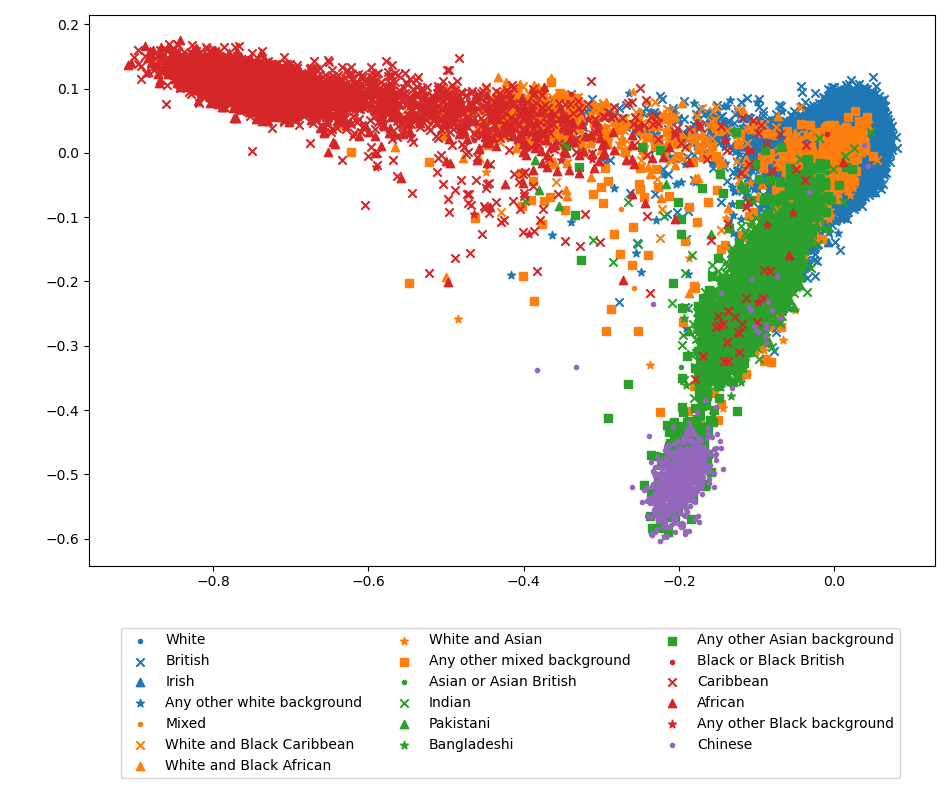

In [7]:
plt.figure(figsize=(9.5, 8))

order = {
    'Ethnic background': [
#         'Do not know',
#         'Prefer not to answer',
        'White',
        'British',
        'Irish',
        'Any other white background',
        'Mixed',
        'White and Black Caribbean',
        'White and Black African',
        'White and Asian',
        'Any other mixed background',
        'Asian or Asian British',
        'Indian',
        'Pakistani',
        'Bangladeshi',
        'Any other Asian background',
        'Black or Black British',
        'Caribbean',
        'African',
        'Any other Black background',
        'Chinese',
#         'Other ethnic group',
    ],
    'Gender': [
        'Male',
        'Female'
    ]
}

colors = {
    'Ethnic background': {
        'Do not know': 'k',
        'Prefer not to answer': 'k',
        'White': 'tab:blue',
        'British': 'tab:blue',
        'Irish': 'tab:blue',
        'Any other white background': 'tab:blue',
        'Mixed': 'tab:orange',
        'White and Black Caribbean': 'tab:orange',
        'White and Black African': 'tab:orange',
        'White and Asian': 'tab:orange',
        'Any other mixed background': 'tab:orange',
        'Asian or Asian British': 'tab:green',
        'Indian': 'tab:green',
        'Pakistani': 'tab:green',
        'Bangladeshi': 'tab:green',
        'Any other Asian background': 'tab:green',
        'Black or Black British': 'tab:red',
        'Caribbean': 'tab:red',
        'African': 'tab:red',
        'Any other Black background': 'tab:red',
        'Chinese': 'tab:purple',
        'Other ethnic group': 'tab:pink',
    },
    'Gender': {
        'Female': 'tab:pink',
        'Male': 'tab:blue'
    }
}

markers = {
    'Ethnic background': {
        'Do not know': '.',
        'Prefer not to answer': 'x',
        'White': '.',
        'British': 'x',
        'Irish': '^',
        'Any other white background': '*',
        'Mixed': '.',
        'White and Black Caribbean': 'x',
        'White and Black African': '^',
        'White and Asian': '*',
        'Any other mixed background': 's',
        'Asian or Asian British': '.',
        'Indian': 'x',
        'Pakistani': '^',
        'Bangladeshi': '*',
        'Any other Asian background': 's',
        'Black or Black British': '.',
        'Caribbean': 'x',
        'African': '^',
        'Any other Black background': '*',
        'Chinese': '.',
        'Other ethnic group': '.',
    },
    'Gender': {
        'Male': 'x',
        'Female': 'x'
    }
}

for e in order[f]:
    n = sum(y == e)
    plt.scatter(
        x[y==e].T[0], x[y==e].T[1], label=e,
        c=colors[f][e],
        marker=markers[f][e])
    
plt.legend(bbox_to_anchor=(0.9667, -.1), ncol=3)
plt.tight_layout()

<IPython.core.display.Javascript object>


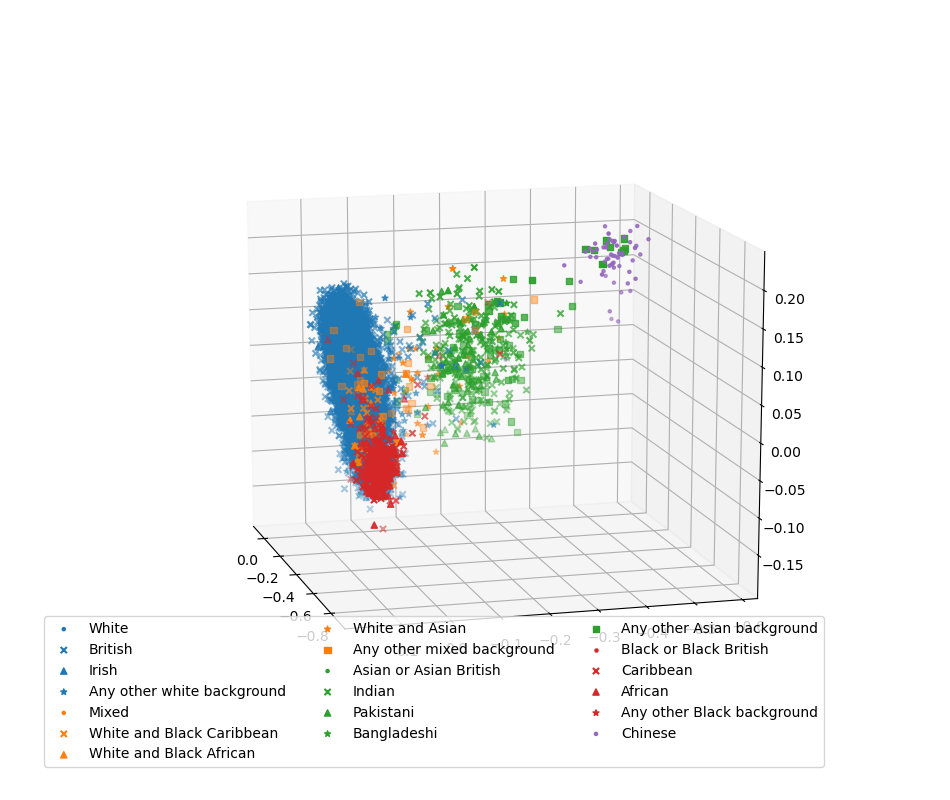

In [8]:
ddf = df.sample(20000)
x = ddf[['PC1', 'PC2', 'PC3']].values
y = ddf[f].values

fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(projection='3d')

for e in order[f]:
    n = sum(y == e)
    ax.scatter(
        x[y==e].T[0], x[y==e].T[1], x[y==e].T[2], label=e,
        color=[colors['Ethnic background'][e]] * n,
        marker=markers['Ethnic background'][e])

ax.view_init(azim=-160, elev=10)
plt.legend(bbox_to_anchor=(0.9667, 0.1667), ncol=3)